In [2]:
from datasets import Dataset, ClassLabel, Image as dsImage

In [3]:
import pandas as pd
import numpy as np

In [4]:
import os

In [21]:
files=[]

In [22]:
directory = 'images/2024/'
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):
        files.append(filepath)

In [23]:
data=pd.DataFrame([files]).T
data=pd.concat([data, pd.Series(np.full(data.shape[0], "")), pd.Series(np.full(data.shape[0], ""))], axis=1)
data.columns=["Path", "auto_labels", "labels"]
data

,Path,auto_labels,labels
0,images/2024/image_1.jpg,,
1,images/2024/image_10.jpg,,
2,images/2024/image_100.jpg,,
3,images/2024/image_101.jpg,,
4,images/2024/image_102.jpg,,
...,...,...,...
265,images/2024/image_95.jpg,,
266,images/2024/image_96.jpg,,
267,images/2024/image_97.jpg,,
268,images/2024/image_98.jpg,,


In [24]:
#data.to_feather("eval_set.feather")

In [13]:
data=pd.read_feather("eval_set.feather")

In [14]:
data.drop(columns=["auto_labels"], inplace=True)

In [15]:
def gen():
    for i, row in data.iterrows():
        yield {
            "image":row["Path"],
            "labels":row["labels"]
        }
        

In [ ]:
dataset=Dataset.from_generator(gen).cast_column("image",dsImage()).cast_column("labels",ClassLabel(names=data["labels"].unique().tolist()))

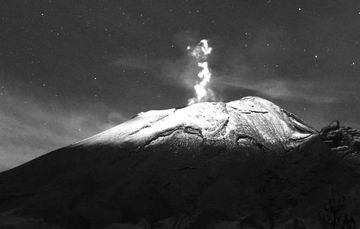

In [25]:
dataset[0]["image"]

In [26]:
dataset.save_to_disk("popocatepetl-eval-dataset")

Saving the dataset (0/1 shards):   0%|          | 0/270 [00:00<?, ? examples/s]